# Sine LSTM prediction
The aim of this notebook is to train a LSTM model being able to predict the values of a sine.

In [4]:
import numpy as np
from matplotlib import pyplot as pl

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras.utils import np_utils

from sklearn import metrics as me

%matplotlib inline

Using TensorFlow backend.


In [14]:
import math

step_radians = 0.01
steps_of_history = 200
steps_in_future = 1
index = 0

# Training set
x = np.sin(np.arange(0, 20*math.pi, step_radians))

seq = []
next_val = []

for i in range(0, len(x) - steps_of_history, steps_in_future):
    seq.append(x[i: i + steps_of_history])
    next_val.append(x[i + steps_of_history])

seq = np.reshape(seq, [-1, steps_of_history, 1])
next_val = np.reshape(next_val, [-1, 1])
print(np.shape(seq))

trainX = np.array(seq)
trainY = np.array(next_val)

# Testing set
x = np.sin(np.arange(20*math.pi, 24*math.pi, step_radians))

seq = []

for i in range(0, len(x) - steps_of_history, steps_in_future):
    seq.append(x[i: i + steps_of_history])

seq = np.reshape(seq, [-1, steps_of_history, 1])
testX = np.array(seq)

(6084, 200, 1)


In [28]:
batch_size = 234
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(200, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 4)                 96        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(trainX, trainY, epochs=25, batch_size=batch_size, verbose=1)

Epoch 1/25
6084/6084 [==============================] - 9s - loss: 0.1751      

[[ 0.91389847]
 [ 0.91122216]
 [ 0.90845841]
 ..., 
 [-0.06722265]
 [-0.0570784 ]
 [-0.04690645]]


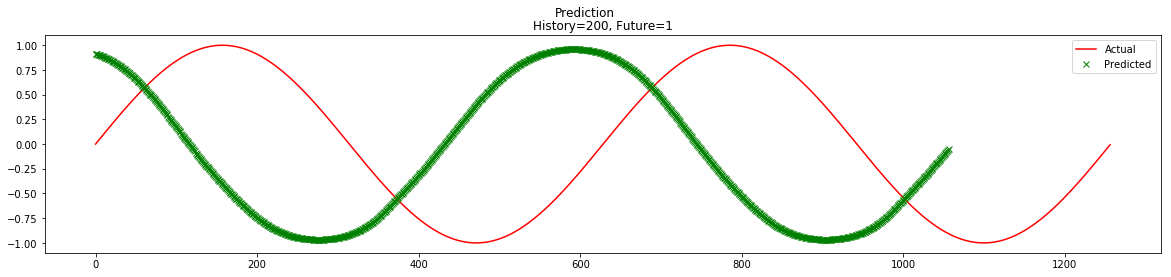

In [36]:
import matplotlib.pyplot as plt

# Predict the future values
predictY = model.predict(testX)
print(predictY)

# Plot the results
plt.figure(figsize=(20,4))
plt.suptitle('Prediction')
plt.title('History='+str(steps_of_history)+', Future='+str(steps_in_future))
plt.plot(x, 'r-', label='Actual')
plt.plot(predictY, 'gx', label='Predicted')
plt.legend()